In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg 


In [2]:
#pip install tensorflow

In [3]:
## INPUT PATH DEFINE 
X_train=r'E:\Machine Learning Projects\Natural_Image\Test'
X_test=r'E:\Machine Learning Projects\Natural_Image\Train'


In [4]:
# re-size all the images to this  VGG16 works on 224,224 size
IMAGE_SIZE = [224, 224]

In [5]:
from tensorflow.keras.applications import InceptionV3


In [6]:
# add preprocessing layer to the front of VGG
# include_top=False means last layer is getting removed 
## this code is alreadu given in Keras 
## weights='imagenet' for reuseing the weights

## vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
## vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
## rest = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
## inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

rest = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:
# don't train existing weights
for layer in rest.layers:         ## for layer in rest.layers // for layer in inception.layers // for layer in vgg.layers
    layer.trainable = False     ## IF we keep true then model will train again and again 

In [13]:
# useful for getting number of classes
import glob

# Get list of folders
folders = glob.glob(r'E:\Machine Learning Projects\Natural_Image/Test/*')


In [15]:
# Print folders
for folder in folders:
    print(folder)


E:\Machine Learning Projects\Natural_Image/Test\cars
E:\Machine Learning Projects\Natural_Image/Test\Trains


In [17]:
#folders2 = glob.glob(r'E:\Machine Learning Projects\Natural_Image/Train/*')


In [19]:
#for folder in folders2:
    #print(folder)

In [21]:
# our layers - you can add more if you want // dense(512) // activation='relu'
x = Flatten()(rest.output)       ## x = Flatten()(rest.output) // x = Flatten()(inception.output) //x = Flatten()(vgg.output)

# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x) ## we have 2 features normal and phenoma /instead of 2 we can provide (len(folders))
## x = Dropout(0.5)(prediction)

In [23]:
prediction

<KerasTensor shape=(None, 2), dtype=float32, sparse=False, name=keras_tensor_312>

In [25]:
# create a model object
from tensorflow.keras.models import Model

model = Model(inputs=rest.input, outputs=prediction)  

## model = Model(inputs=vgg.input, outputs=prediction) 
## model = Model(inputs=rest.input, outputs=prediction)
## model = Model(inputs=inception.input, outputs=prediction)

In [27]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 111, 111, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 111, 111, 32)      │              96 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 111, 111, 32)      │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 109, 109, 32)      │           9,216 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 109, 109, 32)      │              96 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 109, 109, 32)      │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 109, 109, 64)      │          18,432 │ activation_1[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 109, 109, 64)      │             192 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 109, 109, 64)      │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 54, 54, 64)        │               0 │ activation_2[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 54, 54, 80)        │           5,120 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_3         │ (None, 54, 54, 80)        │             240 │ conv2d_3[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 54, 54, 80)        │               0 │ batch_normalization_3[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 52, 52, 192)       │         138,240 │ activation_3[0][0]         │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 21,905,186 (83.56 MB)

 Trainable params: 21,870,754 (83.43 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [28]:
# tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'E:\Machine Learning Projects\Natural_Image\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'E:\Machine Learning Projects\Natural_Image\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [33]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)



Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 86s 86s/step - accuracy: 0.3333 - loss: 0.8318 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 2.0582e-05
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 6.8299e-04 - val_accuracy: 1.0000 - val_loss: 1.1325e-06


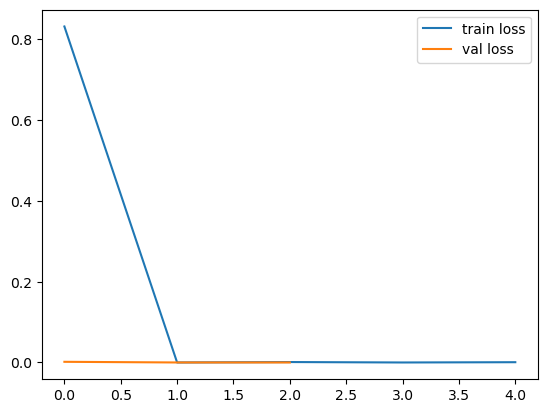

<Figure size 640x480 with 0 Axes>

In [34]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

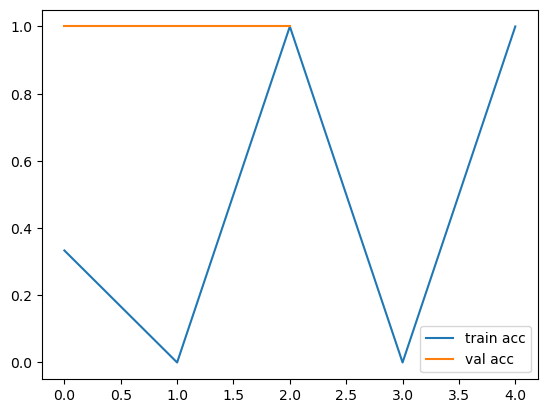

<Figure size 640x480 with 0 Axes>

In [35]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [44]:
# Define an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    shear_range=0.2,          # Apply shear transformations
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,      # Random horizontal flips
    validation_split=0.2)     # Split data for validation


In [46]:
# Load training and validation data
train_data = datagen.flow_from_directory(
    r'E:\Machine Learning Projects\Natural_Image\Train', 
    target_size=(224, 224),   # Resize images
    batch_size=32,
    class_mode='categorical',
    subset='training')

Found 6 images belonging to 2 classes.


In [48]:
validation_data = datagen.flow_from_directory(
    r'E:\Machine Learning Projects\Natural_Image\Test', 
    target_size=(224, 224), 
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 0 images belonging to 2 classes.


# Design and Train Models for Object Recognition


To achieve object recognition, you can implement deep learning models such as Convolutional Neural Networks (CNNs) or use transfer learning with a pre-trained model like ResNet, VGG16, or EfficientNet.

Model Design Example Using Transfer Learning (ResNet50):



In [53]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model


In [55]:
# Load the ResNet50 model pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [56]:
# Add custom classification layers on top of ResNet50
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)  # Assuming 10 classes for image classification


In [59]:
model = Model(inputs=base_model.input, outputs=x)


In [61]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [63]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_data, epochs=10)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 82s 82s/step - accuracy: 0.5000 - loss: 0.6742
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 85s 85s/step - accuracy: 0.5000 - loss: 10.5579
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 91s 91s/step - accuracy: 0.5000 - loss: 210.1354
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 119s 119s/step - accuracy: 0.5000 - loss: 144.4867
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 128s 128s/step - accuracy: 0.5000 - loss: 41.1182
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 132s 132s/step - accuracy: 0.5000 - loss: 53.5144
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 143s 143s/step - accuracy: 0.5000 - loss: 70.2694
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 138s 138s/step - accuracy: 0.5000 - loss: 46.7880
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 140s 140s/step - accuracy: 0.8333 - loss: 5.0469
Epoch 10/10


Vector Search for Image and Text Retrieval


To build a vector search system, you need to convert images into feature vectors using a pre-trained model and store them for retrieval. For text and image search, Approximate Nearest Neighbor (ANN) techniques can be used.

Step 1: Extract image features using the model's output before the final dense layer.
Step 2: Store feature vectors in a database like FAISS or Annoy for fast retrieval.

In [ ]:
import faiss
import numpy as np

In [ ]:
# Example: Extract features from the model
model = Model(inputs=base_model.input, outputs=base_model.layers[-2].output)  # Extract features
image_vectors = model.predict(train_data)  # Convert images into vectors


In [ ]:
# Build FAISS index for vector search
d = image_vectors.shape[1]  # Feature dimension
index = faiss.IndexFlatL2(d)  # L2 distance metric
index.add(image_vectors)  # Add vectors to the index


In [ ]:
# Query the index
query_vector = model.predict(some_image)  # Vectorize the query image
D, I = index.search(query_vector, k=10)   # Retrieve top 10 similar vectors

Collaboration and Integration


In [ ]:
from flask import Flask, request, jsonify
import numpy as np
from tensorflow.keras.models import load_model

app = Flask(__name__)
model = load_model('image_classification_model.h5')  # Load the trained model

@app.route('/predict', methods=['POST'])
def predict():
    file = request.files['image']
    img = preprocess_image(file)  # Custom function to resize and normalize the image
    prediction = model.predict(img)
    return jsonify({'prediction': np.argmax(prediction[0])})

if __name__ == '__main__':
    app.run()


Optimize and Fine-Tune Models


In [ ]:
from tensorflow.keras.layers import Dropout

# Adding a dropout layer to the model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # 50% dropout rate
x = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)